In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train_preprocessed.csv')
test = pd.read_csv(filepath_home+'test_preprocessed.csv')

In [3]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]
train['mach_score'] = train.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)

In [4]:
train[['tp02','tp04','tp06','tp08','tp10']]= 6-train[['tp02','tp04','tp06','tp08','tp10']]

train['Extraversion']=(train.tp01+train.tp06)/2
train['Agreeableness']=(train.tp02+train.tp07)/2
train['Conscientiousness']=(train.tp03+train.tp08)/2
train['Emotional Stability']=(train.tp04+train.tp09)/2
train['Openness to Experiences']=(train.tp05+train.tp10)/2

In [29]:
train.corr(method='spearman')['voted'].abs().sort_values(ascending=False) # 기존 이산형 데이터 기준 education , married 와 관련

voted        1.000000
education    0.337424
married      0.241011
QqA          0.123367
wr_11        0.116715
               ...   
QkE          0.018619
QeA          0.013556
hand         0.006725
QdA          0.002807
wf_01        0.000531
Name: voted, Length: 79, dtype: float64

# 1. education , married 와 vote 의 관계

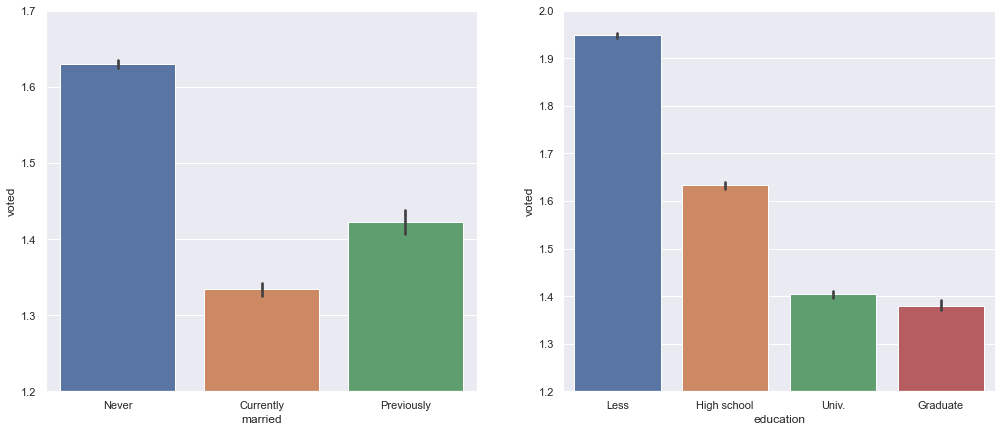

In [53]:
fig1 , (ax1,ax2) = plt.subplots(ncols=2)
fig1.set_size_inches(17,7)
sns.barplot(data=train,x='married',y='voted',ax=ax1)
ax1.set_xticklabels(['Never','Currently','Previously'])
ax1.set_ylim((1.2,1.7))

sns.barplot(data=train,x='education',y='voted',ax=ax2)
ax2.set_xticklabels(['Less','High school','Univ.','Graduate'])
ax2.set_ylim((1.2,2))

fig.tight_layout()

- 현재 기혼 상태인 그룹이 가장 투표율이 좋고 미혼 그룹은 참여율이 낮음
- 학력의 증가가 투표율과 양의 선형 관계인 것을 확인할 수 있음

# 2. 명목형 : Age_group , religion , race

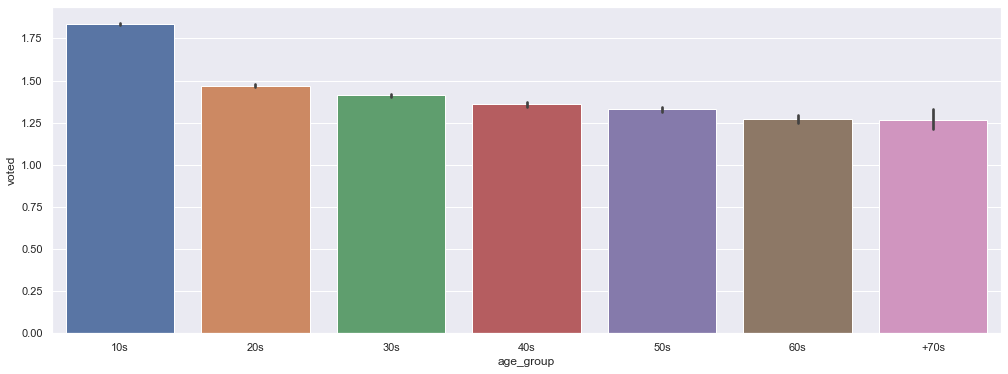

In [65]:
plt.figure(figsize=(17,6)) # age_group
sns.barplot(data=train,x='age_group',y='voted',
           order=['10s','20s','30s','40s','50s','60s','+70s'])

- 10대의 참여율이 특히나 저조하고 높은 연령대로 갈 수록 투표율이 증가하는 것을 확인할 수 있음

In [61]:
# religion
train.groupby(['religion'])['voted'].mean()

religion
Agnostic                1.542602
Atheist                 1.572704
Buddhist                1.621176
Christian_Catholic      1.526512
Christian_Mormon        1.619159
Christian_Other         1.539720
Christian_Protestant    1.434667
Hindu                   1.613016
Jewish                  1.449692
Muslim                  1.687081
Other                   1.582844
Sikh                    1.641026
Name: voted, dtype: float64

- 근소하게 Muslim 은 투표 참여가 낮고 , Jewish, Christian_Protestant 는 높았다

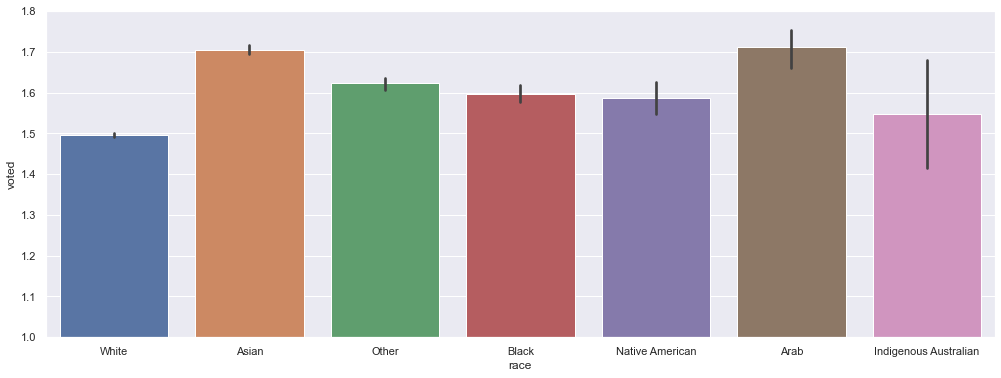

In [64]:
fig,ax =  plt.subplots() # race
fig.set_size_inches(17,6)
ax.set_ylim(1,1.8)
sns.barplot(data=train,x='race',y='voted',ax=ax)

- 다른 인종은 비슷한 수준에서 Asian , Arab 은 특히나 투표 참여율이 저조

# 사용자 정의 특성 : MACH_score , TIPI

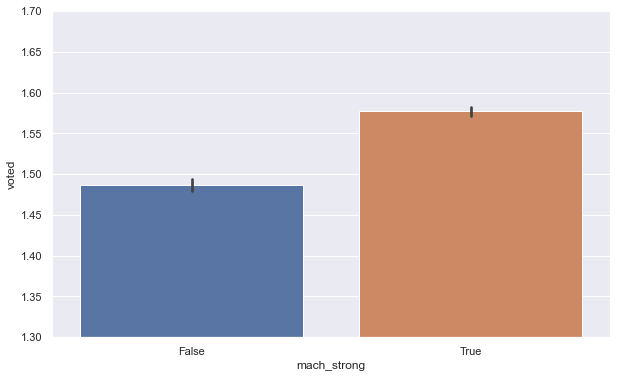

In [83]:
# mach_score
train['mach_strong'] = train.mach_score>=3 # 100점 기준 60점 이상 == 마키아벨리즘 성향 강함
train.groupby(['mach_strong'])['voted'].mean()
fig,ax =  plt.subplots() # race
fig.set_size_inches(10,6)
ax.set_ylim(1.3,1.7)
sns.barplot(data=train,x='mach_strong',y='voted',ax=ax)
train = train.drop(['mach_strong'],axis=1)

In [21]:
train.groupby(['gender'])['voted'].mean()

gender
Female    1.539573
Male      1.553234
Name: voted, dtype: float64

In [11]:
train.groupby(['engnat'])['voted'].mean()

engnat
1    1.537539
2    1.571566
Name: voted, dtype: float64

In [12]:
train.groupby(['urban'])['voted'].mean()

urban
1    1.492872
2    1.540707
3    1.580082
Name: voted, dtype: float64

In [13]:
train.groupby(['gender'])['voted'].mean()

gender
Female    1.539573
Male      1.553234
Name: voted, dtype: float64

In [14]:
train.groupby(['familysize'])['voted'].mean()

familysize
0     1.586689
1     1.575669
2     1.549894
3     1.543088
4     1.516609
5     1.518349
6     1.535800
7     1.480620
8     1.561086
9     1.523810
10    1.525424
11    1.435897
12    1.476190
13    1.363636
14    1.444444
15    1.375000
16    2.000000
17    1.000000
18    2.000000
20    2.000000
21    1.500000
30    1.000000
34    2.000000
44    1.666667
Name: voted, dtype: float64

In [15]:
train.groupby(['education'])['voted'].mean()

education
1    1.948363
2    1.632857
3    1.404461
4    1.380193
Name: voted, dtype: float64

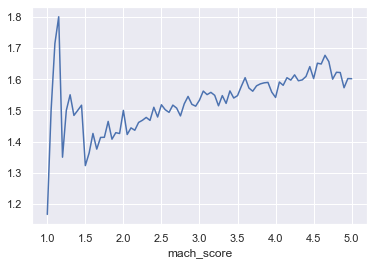

In [24]:
train.groupby(['mach_score'])['voted'].mean().plot(kind='line',rot=0)

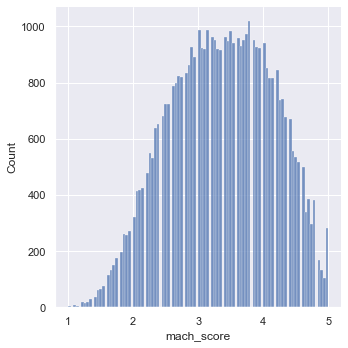

In [26]:
sns.displot(train.mach_score,bins=100)

In [23]:
train.groupby(['mach_score'])['voted'].mean()

mach_score
1.00    1.166667
1.05    1.500000
1.10    1.714286
1.15    1.800000
1.20    1.350000
          ...   
4.80    1.622047
4.85    1.621302
4.90    1.572519
4.95    1.601942
5.00    1.601423
Name: voted, Length: 81, dtype: float64

In [20]:
train.groupby(['voted'])['mach_score'].mean()

voted
1    3.263302
2    3.426417
Name: mach_score, dtype: float64

In [ ]:
100:60 == 5:3